Gradient descent就是根據斜率改變參數(w, b)。                                    
1.可以透過微分的方式計算出一個點的切線斜率。                                      
如何計算出斜率?                                                                 
    先設定好cost function長什麼樣子，這邊的cost function就是(y - y_pred)**2      
    =(y - (w * x + b))**2                                                     
    =(y - w * x)**2                                                           
    w微分 = 2x(w * x + b - y)                                                  
    b微分 = 2(w * x + b - y)                                                   
2.接著開始更新w以及b                                                              
w - w方向斜率 * 學習率                                                          
b - b方向斜率 * 學習率                                                          
3.接著一直重複更新w以及b知道找到最低的cost為止                                    

In [1]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

x = data["YearsExperience"]
y = data["Salary"]

In [2]:
def compute_gradient(x, y, w, b):
    w_gradient = (x*(w*x+b -y)).mean()
    b_gradient = (w*x+b -y).mean()
    return w_gradient, b_gradient

compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.084848484848486)

In [3]:
def compute_cost(x, y, w, b):
    '''
    Parameters:
    x, y(data)
    w, b(random number)
    
    Returns:
    cost = (y - y_pred)**2
    cost = cost.sum() / len(x)
    '''
    y_pred = w*x + b
    cost = (y - y_pred)**2
    cost = cost.sum() / len(x)

    return cost

In [16]:
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

    c_hist = []
    w_hist = []
    b_hist = []

    w = w_init
    b = b_init

    for i in range(run_iter + 1):
        w_gradient, b_gradient = gradient_function(x, y, w, b)

        w = w - w_gradient*learning_rate
        b = b - b_gradient*learning_rate
        cost = cost_function(x, y, w, b)

        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)

        if i%p_iter == 0:
            print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2f}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

    return w, b, w_hist, b_hist, c_hist

In [17]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  5.6568e+03, w:  4.36e-01, b:  0.07, w_gradient: -4.36e+02, b_gradient: -7.26e+01
Iteration  1000 : Cost  1.4097e+02, w:  1.21e+01, b:  8.07, w_gradient:  8.00e-01, b_gradient: -5.32e+00
Iteration  2000 : Cost  9.6063e+01, w:  1.14e+01, b:  12.74, w_gradient:  6.12e-01, b_gradient: -4.08e+00
Iteration  3000 : Cost  6.9732e+01, w:  1.09e+01, b:  16.32, w_gradient:  4.69e-01, b_gradient: -3.12e+00
Iteration  4000 : Cost  5.4293e+01, w:  1.05e+01, b:  19.06, w_gradient:  3.59e-01, b_gradient: -2.39e+00
Iteration  5000 : Cost  4.5241e+01, w:  1.02e+01, b:  21.15, w_gradient:  2.75e-01, b_gradient: -1.83e+00
Iteration  6000 : Cost  3.9933e+01, w:  9.91e+00, b:  22.76, w_gradient:  2.10e-01, b_gradient: -1.40e+00
Iteration  7000 : Cost  3.6821e+01, w:  9.73e+00, b:  23.99, w_gradient:  1.61e-01, b_gradient: -1.07e+00
Iteration  8000 : Cost  3.4996e+01, w:  9.59e+00, b:  24.93, w_gradient:  1.23e-01, b_gradient: -8.22e-01
Iteration  9000 : Cost  3.3926e+01, w:  9.48e+00

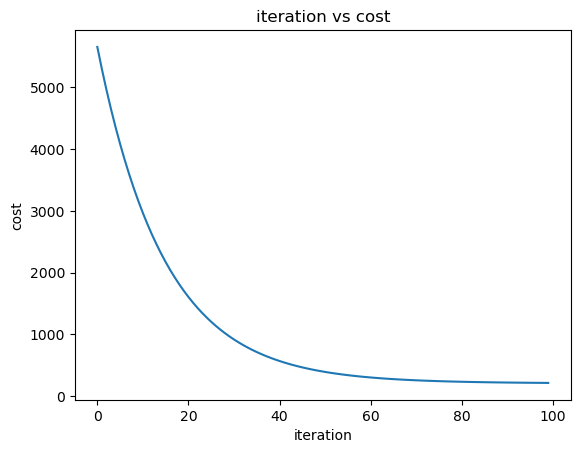

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [7]:
print(f"Finally, w  b=({w_final:.2f}, {b_final:.2f})")

Finally, w  b=(9.14, 27.89)


現在我們已經找到最低的W以及B，所以現在我們可以開始預測數值了!

In [8]:
print(f"年資3.5  預測薪水:{w_final*3.5 + b_final:.1f}K")
print(f"年資5.9  預測薪水:{w_final*5.9 + b_final:.1f}K")

年資3.5  預測薪水:59.9K
年資5.9  預測薪水:81.8K


In [9]:
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
    j = 0
    for b in bs:
        cost = compute_cost(x, y, w, b)
        costs[i,j] = cost
        j = j+1
    i = i+1

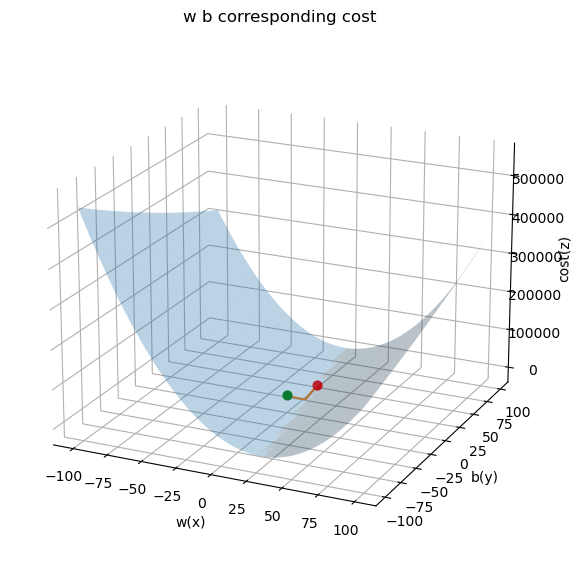

In [10]:
plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((0, 0, 0, 0))
ax.yaxis.set_pane_color((0, 0, 0, 0))
ax.zaxis.set_pane_color((0, 0, 0, 0))

b_grid, w_grid = np.meshgrid(bs, ws)
#np.meshgrid()函數將bs, ws陣列作為輸入，並(返回兩個多維陣列(目的))b_grid和w_grid。b_grid陣列的每個元素都是bs陣列中的元素，而w_grid陣列的每個元素都是ws陣列中的元素。這樣就生成了一個2維的坐標網格，其中b_grid陣列對應水平軸，w_grid陣列對應垂直軸。

ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

ax.set_title("w b corresponding cost")
ax.set_xlabel("w(x)")
ax.set_ylabel("b(y)")
ax.set_zlabel("cost(z)")

w_index, b_index = np.where(costs == np.min(costs))
#上面的costs是一個矩陣，所以要用2個值來表示
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color='green', s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()
